# Ohio teachers' salary data can be obtained [here](http://www.tos.ohio.gov/Transparency_Teacher.aspx)

In [17]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option("display.max_rows",100)
pd.set_option("display.max_columns",50)

In [18]:
df = pd.read_excel('http://www.tos.ohio.gov/Documents/Transparency/2016-2017%20School%20year%20Staff%20Salary%20Information%20for%20download.xlsx')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352360 entries, 0 to 352359
Data columns (total 11 columns):
LAST NAME               352345 non-null object
FIRST NAME              352348 non-null object
EDUCATION LEVEL         352360 non-null object
JOB DESCRIPTION         352360 non-null object
DISTRICT NAME           352199 non-null object
COUNTY                  352137 non-null object
SCHOOL NAME             350662 non-null object
CITY NAME               350662 non-null object
DAYS WORKED             352360 non-null int64
HOURS WORKED PER DAY    352360 non-null float64
PAY AMOUNT              352360 non-null float64
dtypes: float64(2), int64(1), object(8)
memory usage: 29.6+ MB


In [20]:
df.head()

,LAST NAME,FIRST NAME,EDUCATION LEVEL,JOB DESCRIPTION,DISTRICT NAME,COUNTY,SCHOOL NAME,CITY NAME,DAYS WORKED,HOURS WORKED PER DAY,PAY AMOUNT
0,LONGDEN,CHERYL,Masters,Tutor/Small Group Instructor Assignment (Serve...,Ashtabula Area City,Ashtabula,Lakeside High School,Ashtabula,185,7.0,25654.0
1,LONGDEN,CHERYL,Masters,Other Professional  Educational Assignment,Ashtabula Area City,Ashtabula,Lakeside High School,Ashtabula,90,1.0,2000.0
2,Mulligan,Bettylene,Masters,Full-time (Permanent) Substitute Teacher Assig...,Cincinnati City,Hamilton,Cincinnati City,Cincinnati,178,7.0,21890.0
3,Mulligan,Bettylene,Masters,Tutor/Small Group Instructor Assignment (Serve...,Winton Preparatory Academy,Hamilton,Winton Preparatory Academy,Cincinnati,172,8.0,32000.0
4,SMITH,SHERRY,Masters,Other Professional  Other Assignment,Greene County ESC,Greene,Greene County ESC,Yellow Springs,40,8.0,10015.0


In [21]:
df.columns = [col.replace(' ', '_') for col in df.columns]

In [22]:
df.head()

,LAST_NAME,FIRST_NAME,EDUCATION_LEVEL,JOB_DESCRIPTION,DISTRICT_NAME,COUNTY,SCHOOL_NAME,CITY_NAME,DAYS_WORKED,HOURS_WORKED_PER_DAY,PAY_AMOUNT
0,LONGDEN,CHERYL,Masters,Tutor/Small Group Instructor Assignment (Serve...,Ashtabula Area City,Ashtabula,Lakeside High School,Ashtabula,185,7.0,25654.0
1,LONGDEN,CHERYL,Masters,Other Professional  Educational Assignment,Ashtabula Area City,Ashtabula,Lakeside High School,Ashtabula,90,1.0,2000.0
2,Mulligan,Bettylene,Masters,Full-time (Permanent) Substitute Teacher Assig...,Cincinnati City,Hamilton,Cincinnati City,Cincinnati,178,7.0,21890.0
3,Mulligan,Bettylene,Masters,Tutor/Small Group Instructor Assignment (Serve...,Winton Preparatory Academy,Hamilton,Winton Preparatory Academy,Cincinnati,172,8.0,32000.0
4,SMITH,SHERRY,Masters,Other Professional  Other Assignment,Greene County ESC,Greene,Greene County ESC,Yellow Springs,40,8.0,10015.0


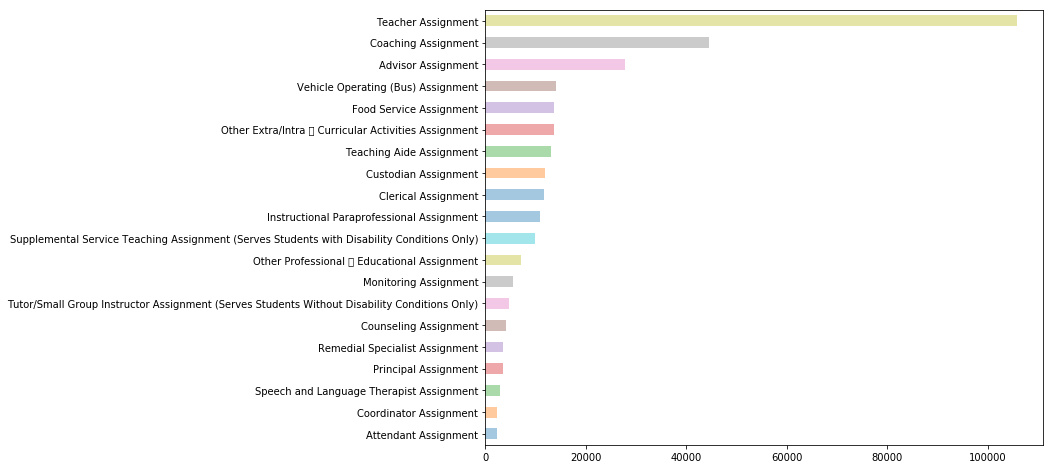

In [25]:
df.JOB_DESCRIPTION.value_counts().sort_values(ascending=False)[:20].sort_values().plot.barh(alpha=0.4)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

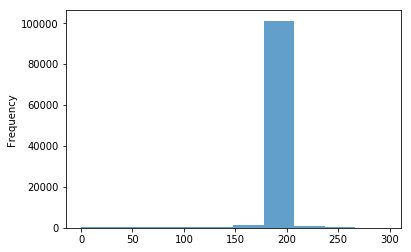

In [26]:
df.query("JOB_DESCRIPTION == 'Teacher Assignment'").DAYS_WORKED.plot.hist(alpha=0.7)
plt.show()

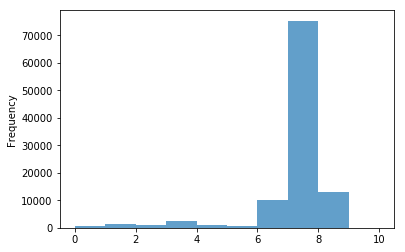

In [27]:
df.query("JOB_DESCRIPTION == 'Teacher Assignment'").HOURS_WORKED_PER_DAY.plot.hist(alpha=0.7)
plt.show()

In [28]:
# Criteria for "full time" teachers
qry = """
JOB_DESCRIPTION == 'Teacher Assignment' \
& HOURS_WORKED_PER_DAY >= 6 \
& DAYS_WORKED >= 180
"""

pd.pivot_table(df.query(qry), index='DISTRICT_NAME', values='PAY_AMOUNT', 
               aggfunc='median').sort_values(by='PAY_AMOUNT', ascending=False)[:20]

,PAY_AMOUNT
DISTRICT_NAME,
Beachwood City,97518.0
Orange City,91957.0
Polaris,86388.5
Shaker Heights City,86072.0
Cleveland Heights-University Heights City,85894.0
Solon City,85155.5
Rocky River City,84932.0
Indian Hill Exempted Village,84125.0
Upper Arlington City,84042.0


In [29]:
by_count = pd.pivot_table(df.query(qry), index='DISTRICT_NAME', values='PAY_AMOUNT', 
               aggfunc='count')
by_count.rename({'PAY_AMOUNT': 'QTY_TEACHERS'}, axis='columns', inplace=True)
by_count

,QTY_TEACHERS
DISTRICT_NAME,
A+ Arts Academy,27
A+ Children's Academy,10
Academy for Urban Scholars Youngstown,3
Academy of Arts and Sciences,7
Academy of Educational Excellence,6
Achieve Career Preparatory Academy,5
Ada Exempted Village,51
Adams County Ohio Valley Local,215
Adena Local,50


In [30]:
by_median = pd.pivot_table(df.query(qry), index='DISTRICT_NAME', values='PAY_AMOUNT', 
               aggfunc='median')
by_median

,PAY_AMOUNT
DISTRICT_NAME,
A+ Arts Academy,36517.0
A+ Children's Academy,30945.0
Academy for Urban Scholars Youngstown,41000.0
Academy of Arts and Sciences,31000.0
Academy of Educational Excellence,1250.0
Achieve Career Preparatory Academy,35500.0
Ada Exempted Village,58040.0
Adams County Ohio Valley Local,55900.0
Adena Local,60184.5


In [31]:
by_counts_median = pd.merge(by_median, by_count, how='inner', left_index=True, right_index=True)

In [32]:
by_counts_median.head()

,PAY_AMOUNT,QTY_TEACHERS
DISTRICT_NAME,,
A+ Arts Academy,36517.0,27
A+ Children's Academy,30945.0,10
Academy for Urban Scholars Youngstown,41000.0,3
Academy of Arts and Sciences,31000.0,7
Academy of Educational Excellence,1250.0,6


In [33]:
by_counts_median.sort_values(by='PAY_AMOUNT', ascending=False)[:20]

,PAY_AMOUNT,QTY_TEACHERS
DISTRICT_NAME,,
Beachwood City,97518.0,111
Orange City,91957.0,141
Polaris,86388.5,46
Shaker Heights City,86072.0,327
Cleveland Heights-University Heights City,85894.0,384
Solon City,85155.5,244
Rocky River City,84932.0,143
Indian Hill Exempted Village,84125.0,128
Upper Arlington City,84042.0,400


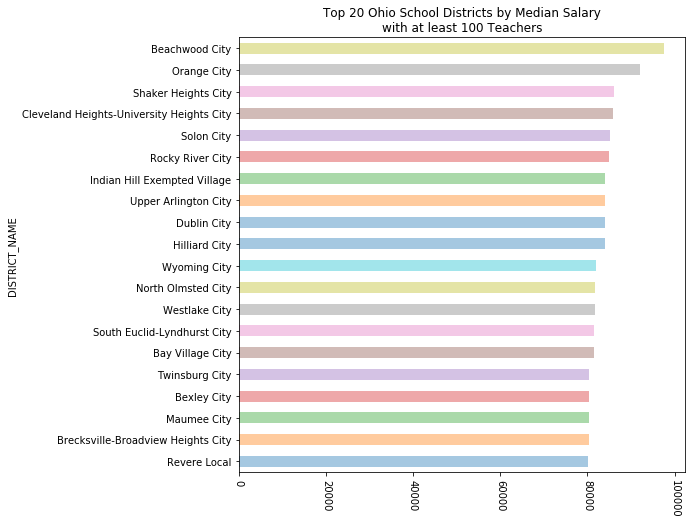

In [34]:
by_counts_median.sort_values(by='PAY_AMOUNT', ascending=False).query("QTY_TEACHERS >= 100")['PAY_AMOUNT'][:20].sort_values(ascending=True).plot.barh(alpha=0.4)
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.xticks(rotation=270)
plt.title('Top 20 Ohio School Districts by Median Salary\nwith at least 100 Teachers')
plt.show()